In [1]:
#Long Short Term Memory (Uzun Süreli Kısa Dönem Belleği)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence

In [9]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [10]:
max_kelime = 500 #500 uzunluklu vektör yani kelime ile duygu analizini yapacağız
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print(X_train)

[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [11]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = 'sigmoid'))

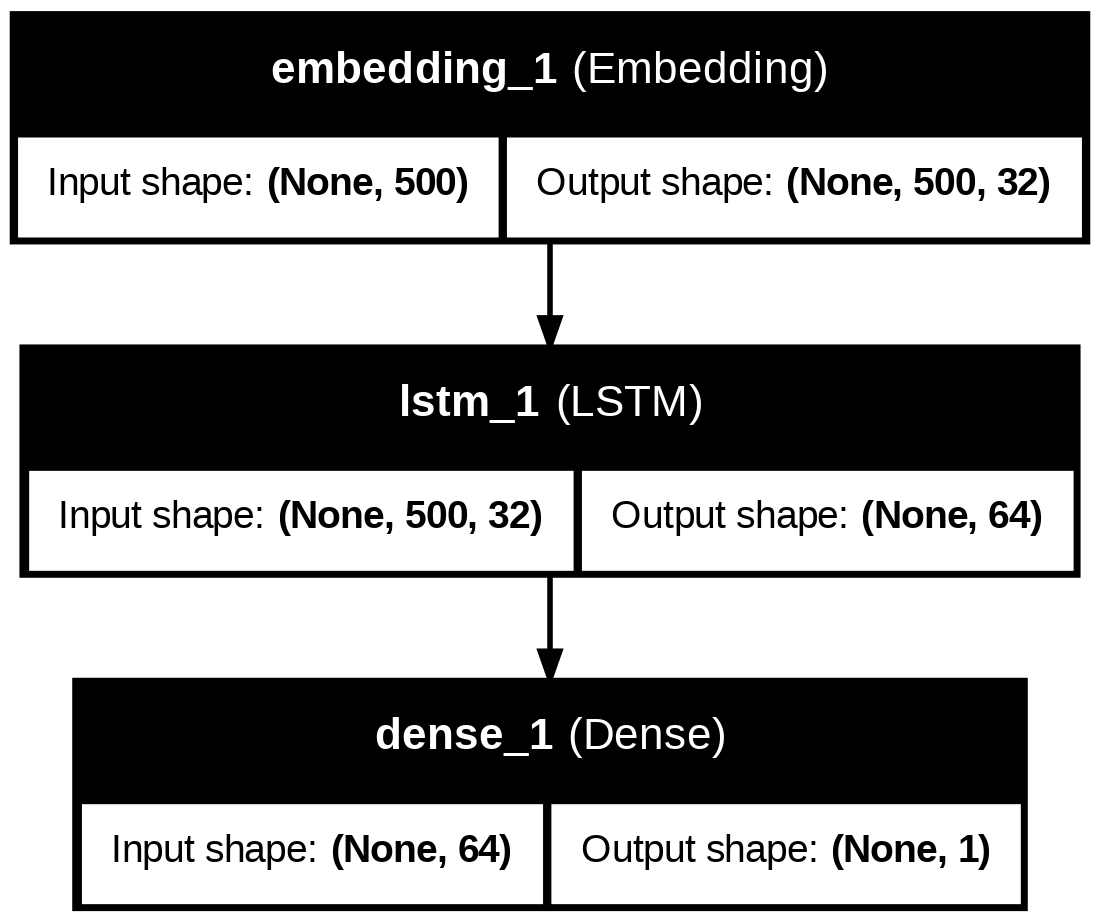

In [12]:
import keras
model.build(input_shape = (None, max_kelime))
keras.utils.plot_model(model, "IMBD-LSTM-modeli-30042025.png", show_shapes = True, show_layer_names = True)

In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5453 - loss: 0.6912 - val_accuracy: 0.7128 - val_loss: 0.6284
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7379 - loss: 0.5930 - val_accuracy: 0.7886 - val_loss: 0.4530
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8351 - loss: 0.3789 - val_accuracy: 0.8576 - val_loss: 0.3369
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8862 - loss: 0.2854 - val_accuracy: 0.8650 - val_loss: 0.3262
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9087 - loss: 0.2409 - val_accuracy: 0.8756 - val_loss: 0.3342
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9171 - loss: 0.2223 - val_accuracy: 0.8576 - val_loss: 0.3291
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9236 - loss: 0.2060 - val_accuracy: 0.8722 - val_loss: 0.3099
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9354 - loss: 0.1830 - val_accuracy: 0.8734 - val_loss:

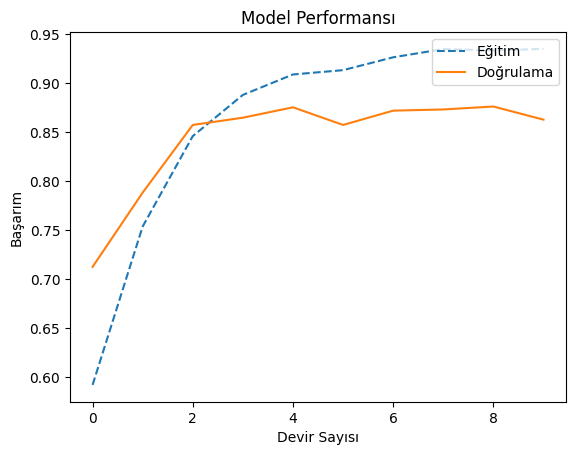

In [16]:
#Performans
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Başarım')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

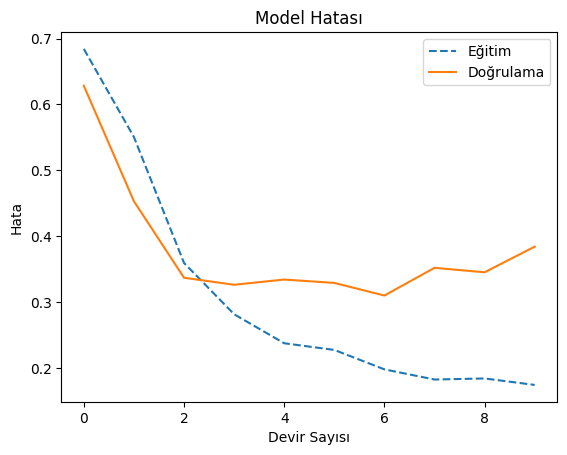

In [17]:
#Hata
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

In [18]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı: %.2f%%" % (performans[1]*100)) 

Modelin Test Performansı: 85.64%


In [19]:
#Test
word_index = imdb.get_word_index() #imdb sözlüğünü çekelim

yorum = "This movie is bad"

yorum_tokens = [word_index[word] for word in yorum.lower().split() if word in word_index]

yorum_tokens_pad = sequence.pad_sequences([yorum_tokens], maxlen = max_kelime)

tahmin = model.predict(yorum_tokens_pad)[0][0]

print(f"Model Çıktısı: {tahmin:.2f}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Model Çıktısı: 0.35


In [20]:
if tahmin > 0.5:
    print("Pozitif Yorum")
else:
    print("Negatif Yorum")

Negatif Yorum


In [21]:
#Derin Otokodlayıcılar (Deep Autoencoders) - Anomali Tespiti Uygulaması

In [22]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

In [23]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                  names = ["Age_of_patient", "year_of_operation", "positive_auxillary_nodes", "Survival_status"])
data.head()

,Age_of_patient,year_of_operation,positive_auxillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [24]:
print(data.shape)

(306, 4)


In [25]:
X = data.drop("Survival_status", axis = 1)
y = data["Survival_status"]

In [26]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler
islem = MinMaxScaler(feature_range = (0,1))
X = islem.fit_transform(X)

In [27]:
#Model Mimarisi
oznitelik_sayisi = X.shape[1]
oznitelik_sayisi

3

In [28]:
#Giriş Katmanı
girislerin_boyutu = Input(shape = (oznitelik_sayisi, ))

#Kodlanacak (encode) değişkenlerin sayısı (darboğaz nöron sayısı)
darbogaz_boyutu = 2

kodlayici = Dense(3, activation = 'relu')(girislerin_boyutu)
kodlayici = Dense(3, activation = 'relu')(kodlayici)

#Darboğaz katmanı
kodlayici = Dense(darbogaz_boyutu, activation = 'relu')(kodlayici)

#Kod Çözücü (decoder)
kod_cozucu = Dense(3, activation = 'relu')(kodlayici)
kod_cozucu = Dense(3, activation = 'sigmoid')(kod_cozucu)

In [29]:
otokodlayici = Model(
    inputs = girislerin_boyutu,
    outputs = kod_cozucu
)

In [30]:
otokodlayici.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
otokodlayici.compile(loss = 'mse', optimizer = 'adam') #mean_squared_error

In [32]:
history = otokodlayici.fit(
    X,
    X,
    epochs = 100,
    batch_size = 16,
    verbose = 2,
    validation_split = 0.2
)

Epoch 1/100
16/16 - 3s - 182ms/step - loss: 0.1085 - val_loss: 0.1197
Epoch 2/100
16/16 - 0s - 5ms/step - loss: 0.1052 - val_loss: 0.1186
Epoch 3/100
16/16 - 0s - 5ms/step - loss: 0.1021 - val_loss: 0.1178
Epoch 4/100
16/16 - 0s - 5ms/step - loss: 0.0987 - val_loss: 0.1171
Epoch 5/100
16/16 - 0s - 5ms/step - loss: 0.0952 - val_loss: 0.1165
Epoch 6/100
16/16 - 0s - 5ms/step - loss: 0.0914 - val_loss: 0.1161
Epoch 7/100
16/16 - 0s - 5ms/step - loss: 0.0874 - val_loss: 0.1159
Epoch 8/100
16/16 - 0s - 5ms/step - loss: 0.0832 - val_loss: 0.1157
Epoch 9/100
16/16 - 0s - 5ms/step - loss: 0.0790 - val_loss: 0.1158
Epoch 10/100
16/16 - 0s - 5ms/step - loss: 0.0748 - val_loss: 0.1166
Epoch 11/100
16/16 - 0s - 5ms/step - loss: 0.0707 - val_loss: 0.1174
Epoch 12/100
16/16 - 0s - 5ms/step - loss: 0.0669 - val_loss: 0.1181
Epoch 13/100
16/16 - 0s - 5ms/step - loss: 0.0634 - val_loss: 0.1180
Epoch 14/100
16/16 - 0s - 5ms/step - loss: 0.0602 - val_loss: 0.1168
Epoch 15/100
16/16 - 0s - 5ms/step - loss

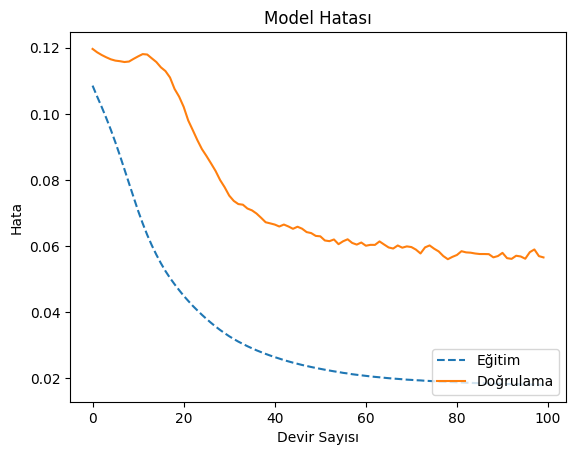

In [33]:
#Hata
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'lower right')
plt.show()

In [34]:
#reconstruction error (yeniden yapılandırma hatası)

ongoruler = otokodlayici.predict(X)
mse = np.mean(np.power(X - ongoruler, 2), axis = 1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


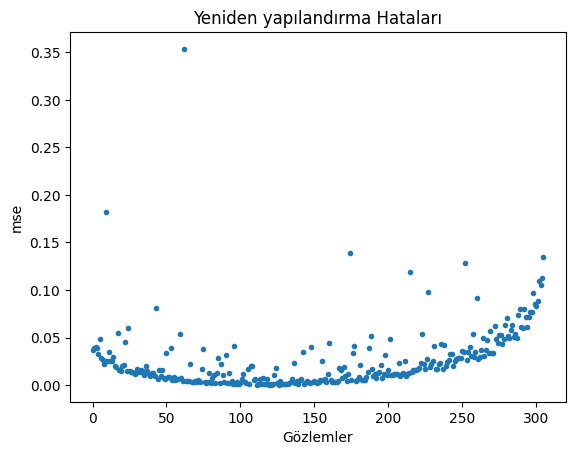

In [35]:
#Hata Grafiği
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = ".")
plt.title("Yeniden yapılandırma Hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.show()

In [36]:
#Eşik değeri oluşturma 
print("\nEşik değeri giriniz : \n")
esik = float(input())


Eşik değeri giriniz : 



 0.13


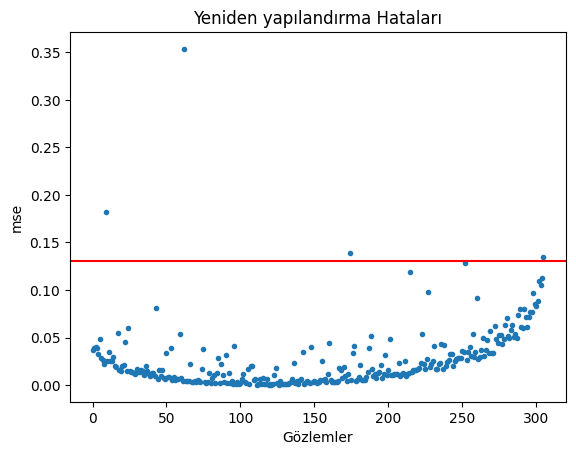

In [37]:
#Eşik değerli hata grafiği
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = ".")
plt.title("Yeniden yapılandırma Hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.axhline(y = esik, color = 'r')
plt.show()

In [38]:
#Anormal Değerlerin Belirlenmesi
anormal = pd.DataFrame(data[mse > esik])
print("Anormal değerlerin sayısı", anormal.shape)

Anormal değerlerin sayısı (4, 4)


In [39]:
#Anormal olan gözlemlerin silinmesi
anormal_yok = pd.DataFrame(data[mse < esik])
print("Önceki Veri:", X.shape)
print("Yeni Veri:", anormal_yok.shape)

Önceki Veri: (306, 3)
Yeni Veri: (302, 4)


In [40]:
#Veri kümesi olarak yazdırma işlemi
cikis = pd.DataFrame(anormal_yok)
cikis.to_csv("haberman_30042025_elveda.csv", index = False)